


Постановка задачи:

$
{U_{tt}=a^2U_{xx}\\
\left\{
  \begin{array}{ccc}
   {
   \left.
  \begin{array}{ccc}
   {(kU - FU_x)|_{x=0}=0\\
   U_x|_{x=l} = 0}
   \end{array}
\right\|-\;Граничные\;условия\\\;
\\
\left.
  \begin{array}{ccc}
   U|_{t=0}=\varphi(x)\\
   U_t|_{t=0}=\psi(x)
   \end{array}
\right\|-\;Начальные\;условия}
  \end{array}
\right.}$


$ $

За $F$ обозначим натяжение струны, чтобы не путать далее

Решение

Делаем замену $U(x,t)=X(x)T(t)$

1)

$X''(x)+\lambda X(x)=0$

${\left\{
  \begin{array}{ccc}
\left.
  \begin{array}{ccc}
   {(kU - FU_x)|_{x=0}=0\\
   U_x|_{x=l} = 0}
   \end{array}
\right\|-\;Граничные\;условия;
\end{array}
\right.}
\Rightarrow{\left\{
  \begin{array}{ccc}
\left.
  \begin{array}{ccc}
   {(kXT - FX'T)|_{x=0}=0\\
   (X'T)|_{x=l} = 0}
   \end{array}
\right.
\end{array}
\right.}\Rightarrow
{\left\{
  \begin{array}{ccc}
\left.
  \begin{array}{ccc}
   {kX(0) - FX'(0)=0\\
   X'(l) = 0}
   \end{array}
\right.
\end{array}
\right.}
$


Получили вспомогательную задачу ***(задачу Штурма-Лиувилля или ЗШЛ)***


$$
X''(x)+\lambda X(x)=0\\\;\\
{\left\{
  \begin{array}{ccc}
\left.
  \begin{array}{ccc}
   {kX(0) - FX'(0)=0\\
   X'(l) = 0}
   \end{array}
\right.
\end{array}
\right.}
$$

Для $\lambda<0$ доказано, что решений нет

Для $\lambda=0$:

$${X''=0\\
X = c_1x+c_2,\;X(0) = c_2\\
X' = c_1,\;X'(0) = c_1,\;X'(l) = c_2}$$

Подставим $X$ в условия ЗШЛ:

$$kc_2 - Fc_1 = 0\\
c_2=0
$$

Тогда $c_1=0$, $X(0)=0$ - получили тривиальное решение, не рассматривается

Осталось рассмотреть $\lambda>0$ :

Общее решение уравнения ЗШЛ: $X(x)=C_1sin(\sqrt{\lambda}x)+C_2cos(\sqrt{\lambda}x)$

Подставим его в условия ЗШЛ: ${\left\{
  \begin{array}{ccc}
\left.
  \begin{array}{ccc}
   {kX(0) - FX'(0)=0\\
   X'(l) = 0}
   \end{array}
\right.
\end{array}
\right.}$

Для этого найдем X' из общего решения уравнения ЗШЛ

$$X'(x) = (C_1sin(\sqrt{\lambda}x)+C_2cos(\sqrt{\lambda}x))' = \sqrt{\lambda}C_1cos(\sqrt{\lambda}x) - \sqrt{\lambda}C_2sin(\sqrt{\lambda}x)$$

Теперь найдем $X(0)$, $X'(0)$ и $X'(l)$

$${X(0) = C_1sin(0) + C_2cos(0) = C2\\
X'(0) = \sqrt{\lambda}C_1cos(0) - \sqrt{\lambda}C_2sin(0) = \sqrt{\lambda}C_1\\
X'(l)=\sqrt{\lambda}C_1cos(\sqrt{\lambda}l) - \sqrt{\lambda}C_2sin(\sqrt{\lambda}l)}$$

И подставим их в условия ЗШЛ

$${kC_2 - F\sqrt{\lambda}C_1=0\\
\sqrt{\lambda}C_1cos(\sqrt{\lambda}l) - \sqrt{\lambda}C_2sin(\sqrt{\lambda}l)=0}$$

Из первого уравнения получаем $C_2 = C_1\frac{F\sqrt{\lambda}}{k}$, подставляем во второе

$${\sqrt{\lambda}C_1cos(\sqrt{\lambda}l) - \sqrt{\lambda}C_1\frac{F\sqrt{\lambda}}{k}sin(\sqrt{\lambda}l)=0\\
cos(\sqrt{\lambda}l) - \frac{F\sqrt{\lambda}}{k}sin(\sqrt{\lambda}l)=0}$$

Cделаем замену $\sqrt{\lambda}l = \mu$, $\lambda=\frac{\mu^2}{l^2}$

тогда получим

$${cos(\mu) = \frac{F\mu}{lk}sin(\mu)\\
ctg(\mu) = \frac{F}{lk}\mu}$$

Получили трансцедентное уравнение

Оно решается только графически

c:\python36\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()
c:\python36\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


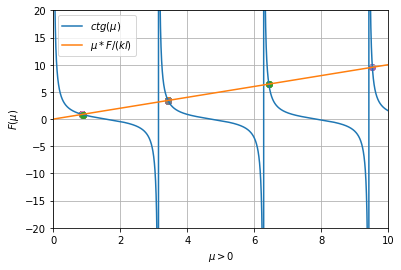

In [109]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

N = 20000
my_range = [0, 10]
power = 2
delta = (my_range[1]-my_range[0])/(N-1)
x = np.arange(my_range[0], my_range[1]+delta, delta)
ctg = lambda v: 1/np.tan(v)

mu = lambda v: v

def equation(X, a):
    return (1/np.tan(X) - a*X)


def solve(eq, value, ex, interval):
    res = np.array([])
    for i in range(len(interval)):
        if (np.abs((eq(interval[i]) - value)) < ex):
            res = np.append(res, interval[i])
    return res        

ds = {'x':np.array([]), 'y':np.array([])}

xx = solve(lambda x: equation(x, 1), 0, 0.05, x)
y = np.array(xx)

for i in range(len(xx)):
    y[i] = equation(xx[i], 0)
    
ds['x'] = xx
ds['y'] = y


def print_plot(x, f, g, ds):
    for i in range(len(ds['x'])):
        plt.scatter(ds['x'][i], ds['y'][i])
    plt.plot(x, f)
    plt.plot(x, g)
    plt.xlabel('$\mu>0$')
    plt.ylabel('$F(\mu)$')
    plt.axis([0,10,-20,20])
    plt.legend(['$ ctg(\mu) $', '$\mu*F/(kl)$'], loc='upper left')
    plt.grid(True)
    plt.show()

print_plot(x, ctg(x), mu(x), ds)

Точками на графике отмеченты $\mu_n$ - решения трансцедентного уравнения

Таким образом, решение ЗШЛ выглядит так (доказано, что константу $C_1$ можно опустить):

$$X_n(x)=sin(\frac{\mu_n}{l}x) + \frac{F\mu_n}{kl}cos(\frac{\mu_n}{l}x)$$
Где $\mu_n$ подчиняется закону $ctg(\mu_n) = \frac{F}{lk}\mu_n$ 

Найдем квадрат нормы $||X||^2$

$${||X||^2 = \int\limits_0^l{X_n^2(x)}dx = \int\limits_0^l{(sin(\frac{\mu_n}{l}x) + \frac{F\mu_n}{kl}cos(\frac{\mu_n}{l}x))^2}dx =\\= \frac{2 F^2 \mu_n^3 + 2 F k l \mu_n + 2 k^2 l^2 \mu_n + sin(2 \mu_n) (F \mu_n - k l) (F \mu_n + k l) - 2 F k l \mu_n cos(2 \mu_n)}{4 k^2 l \mu_n}} $$




Проверим,что $||X||^2>0$

Заметим, что

$$ sin(x) = \frac{2tg(\frac{x}{2})}{1 + tg^2(\frac{x}{2})}$$


$$ cos(x) = \frac{1 - tg^2(\frac{x}{2})}{1 + tg^2(\frac{x}{2})}$$

При этом $ ctg(\mu_n) = \frac{F}{lk}\mu_n $

Тогда

$$ sin(2\mu_n) = \frac{\frac{2}{ctg(\mu_n)}}{1 + \frac{1}{ctg^2(\mu_n)}} = \frac{\frac{2lk}{F\mu_n}}{\frac{F^2\mu_n^2 + l^2k^2}{F^2\mu_n^2}} = \frac{2lkF\mu_n}{F^2\mu_n^2 + l^2k^2}$$

$$cos(2\mu_n) = \frac{F^2\mu_n^2 - l^2k^2}{F^2\mu_n^2 + l^2k^2}$$

Отсюда видно, что $sin(2\mu_n)$ имеет тот же знак, что и $\mu_n$, а так как $\mu_n\gt0$, то и $sin(2\mu_n)$ всегда больше 0

Подставим $sin(2\mu_n)$ и $cos(2\mu_n)$ в выражение для $||X||^2$

$$
{||X||^2 = \frac{2 F^2 \mu_n^3 + 2 F k l \mu_n + 2 k^2 l^2 \mu_n + sin(2 \mu_n) (F \mu_n - k l) (F \mu_n + k l) - 2 F k l \mu_n cos(2 \mu_n)}{4 k^2 l \mu_n} = \\\;\\
= \frac{2 F^2 \mu_n^3 + 2 F k l \mu_n + 2 k^2 l^2 \mu_n + \frac{2lkF\mu_n}{F^2\mu_n^2 + l^2k^2} (F \mu_n - k l) (F \mu_n + k l) - 2 F k l \mu_n \frac{F^2\mu_n^2 - l^2k^2}{F^2\mu_n^2 + l^2k^2}}{4 k^2 l \mu_n} = \\
= \frac{2 F^2 \mu_n^3 + 2 F k l \mu_n + 2 k^2 l^2 \mu_n}{4 k^2 l \mu_n}
}
$$

Так как $F, k, l, \mu_n \gt 0$, то и $||X||^2 \gt 0$

2)

$T''_n(t) + a^2\lambda_nT_n(t)=0$ , $\lambda_n=\frac{\mu_n^2}{l^2}$

$T''_n(t) + a^2\frac{\mu_n^2}{l^2}T_n(t)=0$

Общее решение данного уравнения: $T_n(t) = A_nsin(a\frac{\mu_n}{l}t) + B_ncos(a\frac{\mu_n}{l}t)$

$${B_n = \frac{<\varphi, X_n>}{||X||^2} = \frac{1}{||X||^2}\int\limits_0^l{\varphi(x)X_n(x)}dx\\
A_n = \frac{<\psi, X_n>}{a\frac{\mu_n}{l}||X||^2} = \frac{1}{a\frac{\mu_n}{l}||X||^2}\int\limits_0^l{\psi(x)X_n(x)}dx}$$

3) Находим конечный вид для $U(x,t)$ и записываем ответ:

$$U(x,t) = \sum\limits_{n=1}^{+\infty}T_n(t)X_n(x) = \sum\limits_{n=1}^{+\infty}(A_nsin(a\frac{\mu_n}{l}t) + B_ncos(a\frac{\mu_n}{l}t))(sin(\frac{\mu_n}{l}x) + \frac{F\mu_n}{kl}cos(\frac{\mu_n}{l}x))$$

Где $${B_n = \frac{1}{||X||^2}\int\limits_0^l{\varphi(x)X_n(x)}dx\\
A_n = \frac{1}{a\frac{\mu_n}{l}||X||^2}\int\limits_0^l{\psi(x)X_n(x)}dx\\
||X||^2= \frac{2 F^2 \mu_n^3 + 2 F k l \mu_n + 2 k^2 l^2 \mu_n}{4 k^2 l \mu_n}}$$

и $\mu_n$ подчиняется трансцедентному уравнению $ ctg(\mu_n) = \frac{F}{lk}\mu_n $